### Ejercicio 4 Análisis Exploratorio

Fraude Detection

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
def reduce_mem_usage(df):

    start_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    start_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    print(f'Initial memory usage of dataframe is {start_mem:.2f} MB/{start_mem_GB:.2f} GB')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    end_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    reduction = 100 * (start_mem - end_mem) / start_mem
    print(f'Memory usage after optimization is: {end_mem:.2f} MB/{end_mem_GB:.2f} GB')
    print(f'Decreased by {reduction:.1f}%')
    
    return df

train = reduce_mem_usage(merged_df)

Initial memory usage of dataframe is 447.85 MB/0.44 GB
Memory usage after optimization is: 92.60 MB/0.09 GB
Decreased by 79.3%


In [3]:
import pandas as pd

tra_identy = pd.read_csv("train_identity.csv")
tra_transac = pd.read_csv("train_transaction_new.csv")
tra_identy =tra_identy.iloc[:100000]

Se importan los datos y se utilizan los 100000 primeros registros


In [20]:


merged_df = pd.merge(tra_identy, tra_transac, on='TransactionID',how="left")
print("Numero de observaciones",len(merged_df))


Numero de observaciones 100000


Se hace la union de tablas y se muestra la catidad de registros

In [6]:
merged_df.head()



,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
merged_df.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000000e+05,100000.0,97718.0000,44789.000000,44789.000000,95108.0,95108.0,3616.000000,3616.000000,51171.000000,...,31660.000000,31660.0,31660.0,31660.0,31660.0,31660.0,31660.0,31660.0,31660.0,31660.0
mean,3.134017e+06,NaN,160730.6875,0.067688,-0.057220,NaN,NaN,14.171875,-inf,0.111938,...,0.133911,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,1.004876e+05,0.0,142771.5000,0.590332,0.689453,0.0,0.0,11.179688,25.734375,0.956055,...,0.605957,inf,inf,inf,inf,inf,inf,inf,inf,inf
min,2.987004e+06,-100.0,36.0000,-11.000000,-28.000000,-72.0,-100.0,-46.000000,-100.000000,-36.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.056132e+06,-10.0,67806.5000,0.000000,0.000000,0.0,-5.0,6.000000,-49.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.100498e+06,-5.0,118265.0000,0.000000,0.000000,0.0,0.0,14.000000,-34.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.214332e+06,-5.0,205381.7500,0.000000,0.000000,1.0,0.0,22.000000,-24.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.356008e+06,0.0,999595.0000,10.000000,0.000000,52.0,0.0,61.000000,0.000000,25.000000,...,11.000000,20752.0,32256.0,21248.0,3100.0,3200.0,3100.0,8248.0,8248.0,8248.0


Un resumen de los datos, con su catidad, media, estandat, minimo, maximo y cuartiles, Ahora hay muchos datos asi que se analisatan despues del procesamiento

In [10]:
all_data_NA = merged_df.isna()
pd.concat([merged_df,all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])


Train NA                                                            \
      TransactionID id_01     id_02 id_03 id_04 id_05 id_06 id_07 id_08 id_09   
0           2987004   0.0   70787.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1           2987008  -5.0   98945.0   NaN   NaN   0.0  -5.0   NaN   NaN   NaN   
2           2987010  -5.0  191631.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   
3           2987011  -5.0  221832.0   NaN   NaN   0.0  -6.0   NaN   NaN   NaN   
4           2987016   0.0    7460.0   0.0   0.0   1.0   0.0   NaN   NaN   0.0   
...             ...   ...       ...   ...   ...   ...   ...   ...   ...   ...   
99995       3355991 -25.0  205503.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   
99996       3356004  -5.0  229851.0   NaN   NaN   0.0   0.0   NaN   NaN   NaN   
99997       3356006  -5.0  354127.0   NaN   NaN   0.0   0.0   NaN   NaN   NaN   
99998       3356007  -5.0  104673.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   
99999       3356008  -5.0  192459.0   NaN   NaN   2.0  -1.0   NaN   NaN   NaN   

       ... Test NA                                                          \
       ...    V330   V331   V332   V333   V334   V335   V336   V337   V338   
0      ...   False  False  False  False  False  False  False  False  False   
1      ...   False  False  False  False  False  False  False  False  False   
2      ...    True   True   True   True   True   True   True   True   True   
3      ...    True   True   True   True   True   True   True   True   True   
4      ...   False  False  False  False  False  False  False  False  False   
...    ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
99995  ...    True   True   True   True   True   True   True   True   True   
99996  ...    True   True   True   True   True   True   True   True   True   
99997  ...    True   True   True   True   True   True   True   True   True   
99998  ...    True   True   True   True   True   True   True   True   True   
99999  ...    True   True   True   True   True   True   True   True   True   

              
        V339  
0      False  
1      False  
2       True  
3       True  
4      False  
...      ...  
99995   True  
99996   True  
99997   True  
99998   True  
99999   True  

[100000 rows x 868 columns]

Esta matriz muestra la cantidad de datos faltantes que hay, esto puede verse mejor en la siguiente grafica

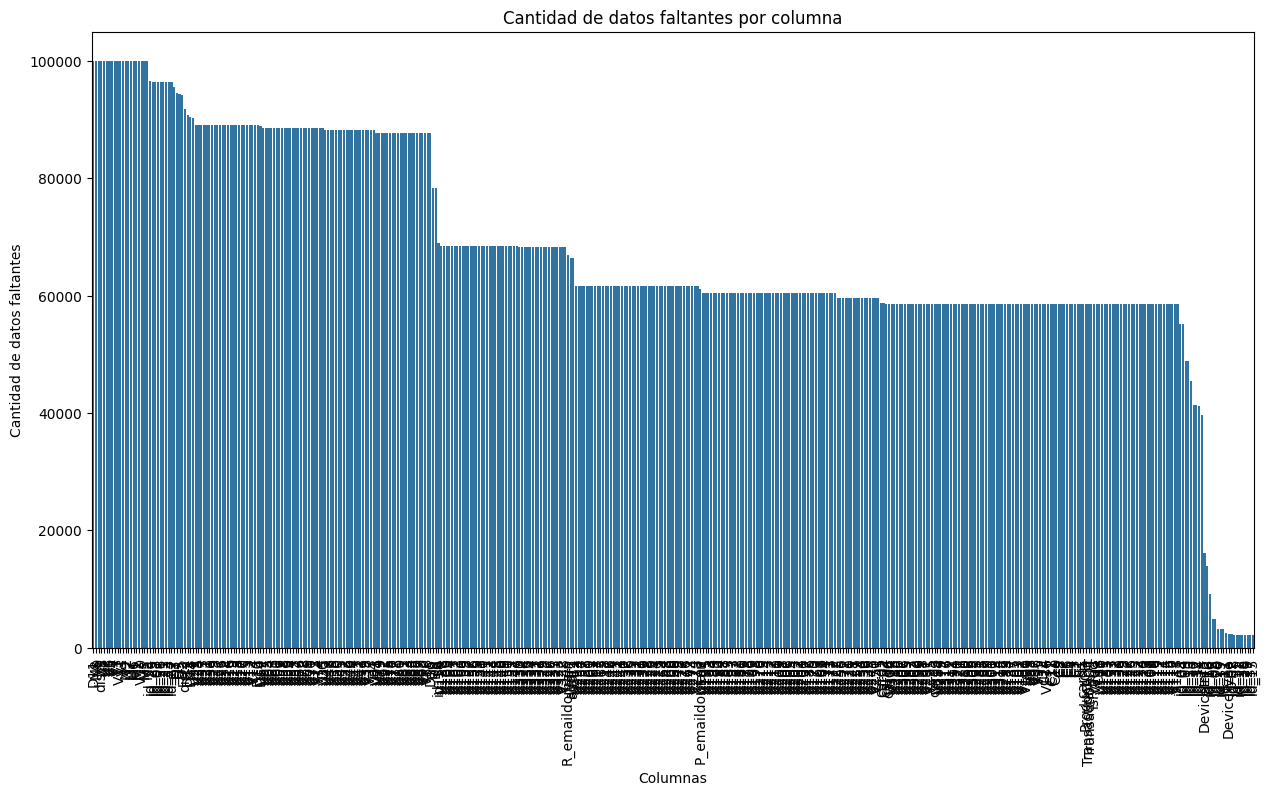

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la cantidad de datos NA por columna
all_data_NA = merged_df.isna().sum()

# Filtrar solo las columnas que tienen datos NA
all_data_NA = all_data_NA[all_data_NA > 0].sort_values(ascending=False)

# Graficar
plt.figure(figsize=(15, 8))
sns.barplot(x=all_data_NA.index, y=all_data_NA.values)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.ylabel('Cantidad de datos faltantes')
plt.xlabel('Columnas')
plt.title('Cantidad de datos faltantes por columna')
plt.show()


Por cada una de las columnas muestra cuantos de sus datos estan vacios, Asi que desidi eliminar aquellas columnas que tengan más del 70% de sus datos vacios

In [15]:
missing_percentage = (merged_df.isna().sum() / len(merged_df)) 
print(missing_percentage)
# Iterar sobre cada columna y eliminar aquellas con más del 50% de datos nulos
cols_to_drop = [col for col in merged_df.columns if missing_percentage[col] > 0.30]

# Eliminar las columnas
merged_df.drop(columns=cols_to_drop, inplace=True)

TransactionID    0.00000
id_01            0.00000
id_02            0.02282
id_05            0.04892
id_06            0.04892
id_11            0.02169
id_12            0.00000
id_13            0.13897
id_15            0.02169
id_16            0.09179
id_17            0.03087
id_19            0.03117
id_20            0.03119
id_28            0.02169
id_29            0.02169
id_31            0.02451
id_35            0.02169
id_36            0.02169
id_37            0.02169
id_38            0.02169
DeviceType       0.02315
DeviceInfo       0.16049
dtype: float64


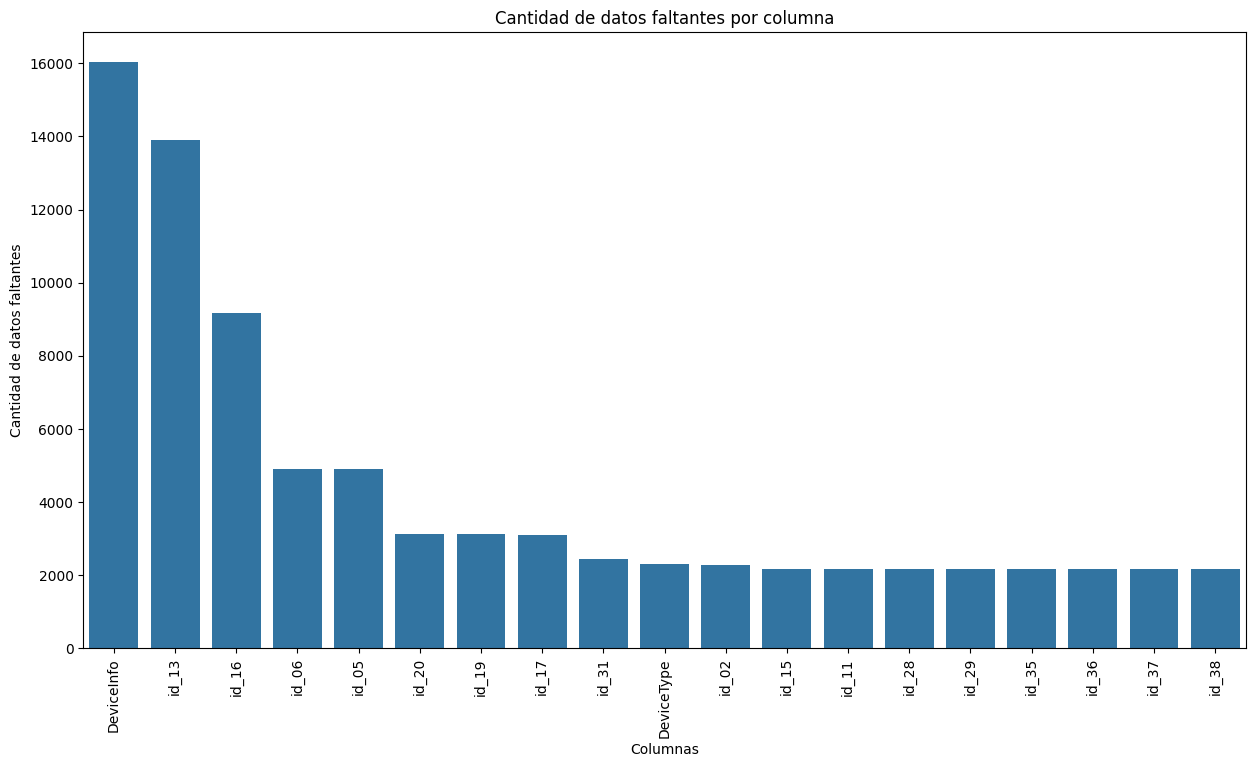

In [14]:
# Calcular la cantidad de datos NA por columna
all_data_NA = merged_df.isna().sum()

# Filtrar solo las columnas que tienen datos NA
all_data_NA = all_data_NA[all_data_NA > 0].sort_values(ascending=False)

# Graficar
plt.figure(figsize=(15, 8))
sns.barplot(x=all_data_NA.index, y=all_data_NA.values)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.ylabel('Cantidad de datos faltantes')
plt.xlabel('Columnas')
plt.title('Cantidad de datos faltantes por columna')
plt.show()

Ahora se puede ver más claramente los datos y cuantas registros tienen vacios

In [17]:
merged_df.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,100.0,NotFound,NaN,New,NotFound,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,NotFound,49.0,New,NotFound,...,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,100.0,NotFound,52.0,Found,Found,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,NotFound,52.0,New,NotFound,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,1.0,0.0,100.0,NotFound,NaN,Found,Found,...,575.0,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS


In [18]:
# Seleccionar solo columnas no numéricas
non_numeric_df = merged_df.select_dtypes(exclude=[np.number])

# Mostrar las columnas no numéricas
non_numeric_df.head()

,id_12,id_15,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,NotFound,New,NotFound,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,NotFound,New,NotFound,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
2,NotFound,Found,Found,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
3,NotFound,New,NotFound,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN
4,NotFound,Found,Found,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS


In [22]:
# Seleccionar solo columnas no numéricas
non_numeric_df = merged_df.select_dtypes(exclude=[np.number])

# Crear el OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' para evitar la multicolinealidad

# Ajustar y transformar las columnas no numéricas
encoded_data = encoder.fit_transform(non_numeric_df)

# Convertir los datos codificados en un DataFrame y asignar nombres de columnas apropiados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(non_numeric_df.columns))

# Si deseas combinar el DataFrame codificado con el original (eliminando las columnas no numéricas originales):
merged_df_one = merged_df.drop(columns=non_numeric_df.columns)
merged_df_one = pd.concat([merged_df, encoded_df], axis=1)
merged_df_one.head()


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,R_emaildomain_nan,M4_M1,M4_M2,M4_nan
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


imputacion


In [29]:
# Seleccionar solo columnas numéricas
numeric_df = merged_df.select_dtypes(include=[np.number])
numeric_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
train = reduce_mem_usage(numeric_df)

Initial memory usage of dataframe is 89.26 MB/0.09 GB
Memory usage after optimization is: 89.26 MB/0.09 GB
Decreased by 0.0%


In [33]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')
imputed_columns = numeric_df.columns[~numeric_df.isna().all()]

# Ajustar el imputador y transformar el DataFrame
numeric_df_imputed = imputer.fit_transform(numeric_df)

# Convertir de nuevo a DataFrame
numeric_df_imputed = pd.DataFrame(numeric_df_imputed, columns=imputed_columns)




Ya se agregaron los datos faltantes usando el metodo de la mediana

In [35]:
numeric_df_imputed

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004.0,0.0,70787.0,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008.0,-5.0,98945.0,0.0,0.0,0.0,-5.0,14.0,-34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010.0,-5.0,191631.0,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987011.0,-5.0,221832.0,0.0,0.0,0.0,-6.0,14.0,-34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987016.0,0.0,7460.0,0.0,0.0,1.0,0.0,14.0,-34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3355991.0,-25.0,205503.0,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,3356004.0,-5.0,229851.0,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,3356006.0,-5.0,354127.0,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,3356007.0,-5.0,104673.0,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Reemplazar inf por nan
df_vif.replace([np.inf, -np.inf], np.nan, inplace=True)

# Opción 1: Imputar valores faltantes (por ejemplo, con la mediana)
for col in df_vif.columns:
    df_vif[col].fillna(df_vif[col].median(), inplace=True)

# Opción 2: Eliminar filas con valores faltantes
# df_vif.dropna(inplace=True)

# Ahora, puedes calcular el VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
print(vif_data)
